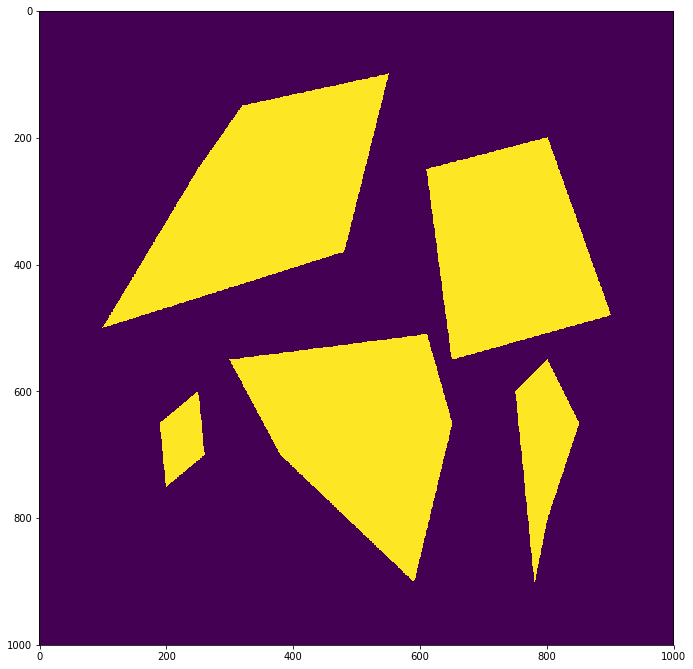

940.0
940.0


In [124]:
import sys
import time
import math
import copy
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import sparse
from scipy.sparse import csgraph
from scipy.spatial import distance
from shapely.geometry import Point, LineString
from shapely.geometry.polygon import Polygon
from scipy.spatial import distance

from PIL import Image, ImageDraw

#space
start = (10,10)
end = (10, 950)
polygons = [[(250, 600), (260, 700), (200, 750), (190, 650)], 
            [(250, 250), (100, 500), (480, 380), (550, 100), (320, 150)], 
            [(300, 550), (380, 700), (590, 900), (650, 650), (610, 510)],
            [(750, 600), (780, 900), (800, 800), (850, 650), (800, 550)],
            [(650, 550), (900, 480), (800, 200), (610, 250)]
           ]

# visualization of space
space = np.zeros((1000,1000), dtype=int)
for polygon in polygons:
    img = Image.new('L', (1000, 1000), 0)
    ImageDraw.Draw(img).polygon(polygon, outline=1, fill=1)
    space = space + np.array(img)
fig = plt.figure(figsize=(25, 25))
ax1 = fig.add_subplot(121)
# Bilinear interpolation - this will look blurry
ax1.imshow(space, interpolation='nearest')
plt.show()

def get_visible_points(actPoint, points, polygons):
    p = []
    for i in points:
        kill = 0
        for j in polygons:
            if j.crosses(LineString([actPoint, i])):
                kill = 1
        if kill == 0:
            p.append(i)
    return p
            
    
act_point = start
_polygons = [Polygon(x) for x in polygons]
_points = {}

_points[start] = 0
_points[end] = 1
cnt = 2
for x in polygons:
    for y in x:
        _points[y] = cnt
        cnt += 1
        
distances = np.full((cnt,cnt), dtype=int, fill_value = sys.maxsize)

for pt in _points:
    for j in get_visible_points(pt, _points, _polygons):
        distances[_points[j]][_points[pt]] = distance.euclidean(pt, j)
print(sc.sparse.csgraph.floyd_warshall(distances)[0][1])
print(sc.sparse.csgraph.floyd_warshall(distances)[1][0])



